# Testing GraphSearch Distance Concepts

## Load Libraries

In [1]:
import srex
import operator
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords

#Download stopword
nltk.download('stopwords') 
nltk.download('punkt') # Tokenizers
nltk.download('wordnet') # Wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Initialize some variables

In [2]:
# Stop Words
stop_words_list = stopwords.words('english') #a small one

In [3]:
newStopWords = get_stop_words('en') # a big one

In [4]:
stop_words_list.extend(newStopWords) # all together

In [5]:
query                  = 'internet of things'
reference_term         = 'iot'
nr_search_results      = 10

ranking_weight_type    = 'none' # it can be: 'none', 'linear' or 'inverse'
limit_distance         = 4 
sumarize               = 'none' 
include_reference_term = False
nr_of_graph_terms      = 5


In [6]:
# Articulo de revista científica IEEE Explore
#doc = srex.get_ieee_explore_article('article_number', '8316016')

# Ranking de documentos de IEEE Explore CON ponderación de documentos
results = srex.get_ieee_explore_ranking(query, nr_search_results)

# Ranking de documentos de IEEE Explore SIN ponderación de documentos
#results = srex.get_ieee_explore_ranking("search engine", 10)

In [25]:
#results
#stop_words_list
#doc_list = srex.get_ranking_as_list(results, ['title','abstract'])
#doc_list

In [7]:
doc_weighted = srex.get_ranking_as_string(results, ranking_weight_type)
#doc_weighted

In [8]:
sentences_list = doc_weighted.split('.')

## Text transformations

Remove stopwords, punctuation, stemming, lematization

In [9]:
processed_sentences_list = list(map(lambda x: srex.text_transformations(x, stop_words_list, lema=True, stem=False), sentences_list))
#processed_sentences_list

#Testing
#positions_dict = srex.get_term_positions_dict(processed_sentences_list[0])
#positions_dict

## Calculate word positions

In [30]:
doc_pos_matrix = srex.get_documents_positions_matrix(processed_sentences_list)
#doc_pos_matrix
#len(doc_pos_matrix)

## Calculate vecinity matrix

In [32]:
vecinity_matrix = srex.get_vecinity_matrix(doc_pos_matrix, reference_term, limit_distance, sumarize, include_reference_term)
#vecinity_matrix
#len(vecinity_matrix)

In [12]:
unique_vecinity_dict = srex.get_unique_vecinity_dict(vecinity_matrix)

In [13]:
terms_freq_dict = {k: len(v) for k, v in unique_vecinity_dict.items()}

In [14]:
foo = srex.normalize_dictionary_values(terms_freq_dict, [1,20])

In [15]:
sorted_terms_freq_dict = sorted(terms_freq_dict.items(), key=operator.itemgetter(1), reverse=True)

In [16]:
first_sorted_terms_freq_dict = {k: v for k, v in list(sorted_terms_freq_dict)[:nr_of_graph_terms]}

In [17]:
most_freq_distance_dict = {k: {'frequency':terms_freq_dict[k], 'distance':srex.np.median(unique_vecinity_dict[k])} for k in first_sorted_terms_freq_dict.keys()}

In [18]:
most_freq_distance_dict

{'network': {'frequency': 20.0, 'distance': 1.0},
 'device': {'frequency': 20.0, 'distance': 1.0},
 'application': {'frequency': 15.25, 'distance': 1.0},
 'system': {'frequency': 10.5, 'distance': 1.0},
 'cyber': {'frequency': 10.5, 'distance': 2.0}}

In [19]:
graph = srex.getGraphViz(reference_term, most_freq_distance_dict, '0.7', 'deepskyblue')

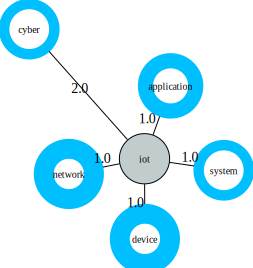

In [20]:
graph